# A Brownian Bridge On the RKI: Pricing Barrier Options using Monte Carlo

# By: Marcos Costa Santos Carreira

# April 2016

## Goal: Price a RKO Put and the equivalent RKI Put using Brownian Bridge with the goal of using the lowest number of path points possible (with a reasonable margin of error)

## Formulas for pricing barrier options without rebates (Haug):

(1) $$ \mu =\frac{b-\frac{\sigma ^2}{2}}{\sigma ^2};b=r-q;$$

(2) $$ \lambda =\sqrt{\mu ^2+\frac{2 r}{\sigma ^2}};$$

"What immortal hand or eye

Could frame thy fearful symmetry?"

(3) $$ x_1=\frac{\log \left(\frac{S}{X}\right)}{\sigma  \sqrt{t}}+(1+ \mu) \sigma  \sqrt{t};$$

(4) $$ x_2=\frac{\log \left(\frac{S}{H}\right)}{\sigma  \sqrt{t}}+(1+ \mu) \sigma  \sqrt{t};$$

(5) $$ y_1=\frac{\log \left(\frac{H^2}{S X}\right)}{\sigma  \sqrt{t}}+(1+ \mu) \sigma  \sqrt{t};$$

(6) $$ y_2=\frac{\log \left(\frac{H}{S}\right)}{\sigma  \sqrt{t}}+(1+ \mu) \sigma  \sqrt{t};$$

Formula 7 (A) corresponds to the plain vanilla option:

(7) $$ A=\phi S e^{(b-r) t} N  \left(\phi x_1 \right) -\phi X e^{-r t} N  \left(\phi x_1 - \phi \sigma  \sqrt{t}  \right);$$

(8) $$ B=\phi S e^{(b-r) t} N  \left(\phi x_2 \right) -\phi X e^{-r t} N  \left(\phi x_2 - \phi \sigma  \sqrt{t}  \right);$$

(9) $$ C=\phi S e^{(b-r) t} \left(\frac{H}{S}\right)^{2 (\mu +1)} N \left(\eta  y_1\right) -\phi X  e^{-r t} \left(\frac{H}{S}\right)^{2 \mu } N \left(\eta  y_1-\eta  \sigma  \sqrt{t}\right);$$

(10) $$ D=\phi S e^{(b-r) t} \left(\frac{H}{S}\right)^{2 (\mu +1)} N \left(\eta  y_2\right) -\phi X  e^{-r t} \left(\frac{H}{S}\right)^{2 \mu } N \left(\eta  y_2-\eta  \sigma  \sqrt{t}\right);$$

For a put where H<X and H<S:

(11) $$ pKI=B-C+D;$$

(12) $$ pKO=A-B+C-D;$$

And as expected:

(13) $$ p=pKI+pKO=A;$$

### Simplifying the formulas for the particular case r=q=b=0:

(1.b) $$ \mu =-\frac{1}{2}$$

(2.b) $$ \lambda =\frac{1}{2};$$

(3.b) $$ x_1=\frac{\log \left(\frac{S}{X}\right)}{\sigma  \sqrt{t}}+(\frac{1}{2}) \sigma  \sqrt{t};$$

(4.b) $$ x_2=\frac{\log \left(\frac{S}{H}\right)}{\sigma  \sqrt{t}}+(\frac{1}{2}) \sigma  \sqrt{t};$$

(5.b) $$ y_1=\frac{\log \left(\frac{H^2}{S X}\right)}{\sigma  \sqrt{t}}+(\frac{1}{2}) \sigma  \sqrt{t};$$

(6.b) $$ y_2=\frac{\log \left(\frac{H}{S}\right)}{\sigma  \sqrt{t}}+(\frac{1}{2}) \sigma  \sqrt{t};$$

(7.b) $$ A=\phi \left( S N  \left(\phi x_1 \right) - X N  \left(\phi \left(x_1 - \sigma  \sqrt{t} \right)  \right)\right);$$

(8.b) $$ B=\phi \left( S N  \left(\phi x_2 \right) - X N  \left(\phi \left(x_2 - \sigma  \sqrt{t} \right)  \right)\right);$$

(9.b) $$ C=\phi\left( H N \left(\eta  y_1\right) - \frac{S X}{H} N \left(\eta\left(  y_1-  \sigma  \sqrt{t}\right)\right)\right);$$

(10.b) $$ D=\phi\left( H N \left(\eta  y_2\right) - \frac{S X}{H} N \left(\eta\left(  y_2-  \sigma  \sqrt{t}\right)\right)\right);$$

## Time to start coding

In [1]:
from __future__ import division

Import modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

/Users/marcoscscarreira/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
%matplotlib inline

## Defining the Black&Scholes function

In [4]:
def bsv(phi,S,K,r,q,vol,t):
    mu=((r-q)-(vol**2)/2)/(vol**2)
    efv=t*(vol**2)
    # calculate d1 and d2
    d1=(np.log(S/K))/(np.sqrt(efv))+(1+mu)*(np.sqrt(efv))
    d2=d1-np.sqrt(efv)
    # calculate N(d1) and N(d2)
    Nd1=st.norm.cdf(phi*d1)
    Nd2=st.norm.cdf(phi*d2)
    # calculate premium, delta
    de=phi*np.exp(-q*t)*Nd1
    pr=phi*S*np.exp(-q*t)*Nd1-phi*K*np.exp(-r*t)*Nd2
    return [pr,de]

### Defining parameters

In [5]:
S0=100
phi=-1
eta=1
K=100
H=85
r=0
q=0
vol=0.20
T=128/256
nst0=128
npth=50000

### Calculating the plain vanilla prices

In [6]:
putpr, putdel = bsv(phi,S0,K,r,q,vol,T)
callpr, calldel = bsv(phi,S0,K,r,q,vol,T)

In [7]:
[putpr, callpr]

[5.6371977797016655, 5.6371977797016655]

## Defining the other functions for the RKO and RKI formulas:

In [8]:
def bsv2(phi,S,K,H,r,q,vol,t):
    mu=((r-q)-(vol**2)/2)/(vol**2)
    efv=t*(vol**2)
    # calculate d1 and d2
    d1=(np.log(S/H))/(np.sqrt(efv))+(1+mu)*(np.sqrt(efv))
    d2=d1-np.sqrt(efv)
    # calculate N(d1) and N(d2)
    Nd1=st.norm.cdf(phi*d1)
    Nd2=st.norm.cdf(phi*d2)
    # calculate value
    pr=phi*S*np.exp(-q*t)*Nd1-phi*K*np.exp(-r*t)*Nd2
    return pr

In [9]:
def bsv3(phi,eta,S,K,H,r,q,vol,t):
    mu=((r-q)-(vol**2)/2)/(vol**2)
    lmb=np.sqrt((mu**2)+(2*r)/(vol**2))
    efv=t*(vol**2)
    # calculate d1 and d2
    d1=(np.log((H/S)*(H/K)))/(np.sqrt(efv))+(1+mu)*(np.sqrt(efv))
    d2=d1-np.sqrt(efv)
    # calculate N(d1) and N(d2)
    Nd1=st.norm.cdf(eta*d1)
    Nd2=st.norm.cdf(eta*d2)
    # calculate value
    pr=phi*S*(H/S)**(2*(mu+1))*np.exp(-q*t)*Nd1-phi*K*(H/S)**(2*mu)*np.exp(-r*t)*Nd2
    return pr

In [10]:
def bsv4(phi,eta,S,K,H,r,q,vol,t):
    mu=((r-q)-(vol**2)/2)/(vol**2)
    lmb=np.sqrt((mu**2)+(2*r)/(vol**2))
    efv=t*(vol**2)
    # calculate d1 and d2
    d1=(np.log(H/S))/(np.sqrt(efv))+(1+mu)*(np.sqrt(efv))
    d2=d1-np.sqrt(efv)
    # calculate N(d1) and N(d2)
    Nd1=st.norm.cdf(eta*d1)
    Nd2=st.norm.cdf(eta*d2)
    # calculate value
    pr=phi*S*(H/S)**(2*(mu+1))*np.exp(-q*t)*Nd1-phi*K*(H/S)**(2*mu)*np.exp(-r*t)*Nd2
    return pr

### Calculating the KI and KO prices

In [11]:
putKIpr = bsv2(phi,S0,K,H,r,q,vol,T)-bsv3(phi,eta,S0,K,H,r,q,vol,T)+bsv4(phi,eta,S0,K,H,r,q,vol,T)

In [12]:
putKIpr

4.1213831653884165

Consulting the Haug spreadsheets:

In [13]:
img1=plt.imread('RKI.png')

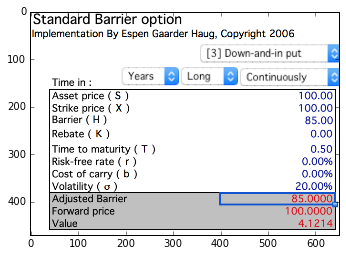

In [14]:
plt.imshow(img1)

In [15]:
putKOpr = bsv(phi,S0,K,r,q,vol,T)[0]-putKIpr

In [16]:
putKOpr

1.5158146143132489

Consulting the Haug spreadsheets:

In [17]:
img2=plt.imread('RKO.png')

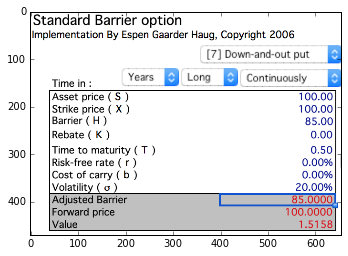

In [18]:
plt.imshow(img2)

### Auxiliary functions

In [19]:
def ca(x,size):
    y=np.empty(size)
    y.fill(x)
    return y

In [20]:
def ppzero(s):
    return pd.Series(pd.Series.append(pd.Series([0]),s).values)

## Monte Carlo path generator

In [21]:
def mcpath(nsteps, S0, drift, vol, t):
    # generate random numbers
    nmdr=pd.Series(np.random.standard_normal(nsteps))
    # find each step
    dt=t*1/nsteps
    ts=pd.Series(ca(dt,nsteps))
    ts0=ppzero(ts)
    s1=(drift-(vol**2)/2)*dt
    s2=vol*np.sqrt(dt)
    steps=s1*pd.Series(ca(1,nsteps))+s2*nmdr
    steps0=ppzero(steps)
    # add steps
    cmsteps=steps0.cumsum()
    cts=ts0.cumsum()
    # convert steps to path
    Sj=S0*np.exp(cmsteps.values)
    # return timeseries [t,St]
    return pd.Series(Sj,index=cts.values)

In [22]:
testpath0=mcpath(10,S0,r-q,vol,T)

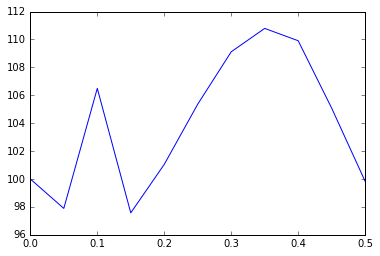

In [23]:
testpath0.plot()

## Monte Carlo paths generator

In [24]:
def mcpaths(npaths, nsteps, S0, drift, vol, t):
    # generate npaths using mcpath
    paths=pd.DataFrame([mcpath(nsteps, S0, drift, vol, t) for j in range(npaths)])
    return paths

In [25]:
testpath1=mcpaths(5,10,S0,r-q,vol,T)

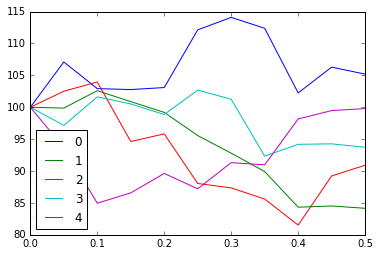

In [26]:
testpath1.transpose().plot()

## Simulating the values at the maturity

In [27]:
npt1=npth

In [28]:
testst=mcpaths(npt1,1,S0,r-q,vol,T)

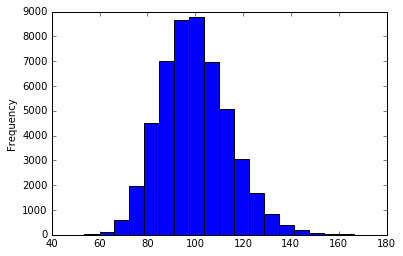

In [29]:
(testst.transpose()).iloc[1].plot(kind='hist', bins=20)

In [30]:
[100*np.exp((r-q)*T),(testst.transpose()).iloc[1].mean()]

[100.0, 99.96409294220278]

## Checking the payoff of the vanilla calls and puts

In [31]:
putpocalc=np.maximum((K-(testst.transpose()).iloc[1]),0).mean()
callpocalc=np.maximum(((testst.transpose()-K).iloc[1]),0).mean()

In [32]:
[putpr, putpocalc*np.exp(-r*T)]

[5.6371977797016655, 5.6585398484320306]

In [33]:
[callpr, callpocalc*np.exp(-r*T)]

[5.6371977797016655, 5.6226327906343014]

In [34]:
[(putpr+callpr)/2, (putpocalc+callpocalc)*np.exp(-r*T)/2]

[5.6371977797016655, 5.640586319533166]

## Checking the convergence of Monte Carlo

In [35]:
putporoll=np.maximum((K-(testst.transpose()).iloc[1]),0).cumsum()/np.array(np.arange(1,npt1+1))
callporoll=np.maximum(((testst.transpose()-K).iloc[1]),0).cumsum()/np.array(np.arange(1,npt1+1))

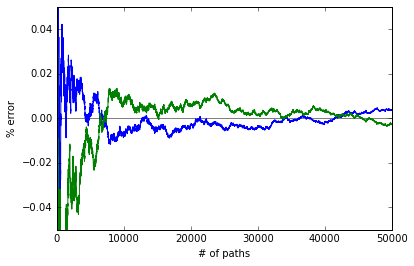

In [36]:
ax1,ax2,ay1,ay2 = plt.axis()
plt.axis((ax1,ax2,-0.05,+0.05))
plt.axhline(0, color='grey')
plt.xlabel('# of paths')
plt.ylabel('% error')
pd.Series(putporoll/putpr-1).plot()
pd.Series(callporoll/callpr-1).plot()

The chart above should be quite symmetrical, given that a positive error for the call is a negative error for the put and vice versa.

## Simulating the values for more steps

In [37]:
npt2=npth

In [38]:
nstp2=nst0

In [39]:
testst2=mcpaths(npt2,nstp2,S0,r-q,vol,T)

The formula for the payout of the One-Touch paying 1 at expiration with S>H:

(11) $$ OTpo=N \left( \phi \left( x_2 - \sigma \sqrt{t} \right) \right) + \left( \frac{H}{S}\right)^{2 \mu } N \left( \eta \left( y_2 - \sigma \sqrt{t} \right) \right) ;$$

This corresponds to the probability of hitting the barrier over the life of the option.

In [40]:
def otpo(phi,eta,S,H,r,q,vol,t):
    mu=((r-q)-(vol**2)/2)/(vol**2)
    lmb=np.sqrt((mu**2)+(2*r)/(vol**2))
    efv=t*(vol**2)
    # calculate arguments for N(): x2 - vol sqrt(t) and y2 - vol sqrt(t)
    d1=(np.log(S/H))/(np.sqrt(efv))+(1+mu)*(np.sqrt(efv))-np.sqrt(efv)
    d2=(np.log(H/S))/(np.sqrt(efv))+(1+mu)*(np.sqrt(efv))-np.sqrt(efv)
    # calculate N(d1) and N(d2)
    Nd1=st.norm.cdf(phi*d1)
    Nd2=st.norm.cdf(eta*d2)
    # calculate value
    pr=Nd1+(H/S)**(2*mu)*Nd2
    return pr

Expected frequency of hits:

In [41]:
ph85=otpo(-1,+1,S0,H,r,q,vol,T)
ph85

0.27129719564023963

Measured frequency of hits:

In [42]:
def hitbd(s,b):
    if (np.min(s)<=b):
        return 1
    else:
        return 0

In [43]:
hit85=np.array(map(lambda x: hitbd(x,H),testst2.values))

In [44]:
hit85.mean()

0.25180000000000002

Why these two aren't equal? We forgot the continuity correction:

In [45]:
beta=0.5826
ccf=np.exp(-beta*vol*np.sqrt(T/nstp2))
ccf

0.99274395314915387

Adjusting the barrier:

In [46]:
ph85cc=otpo(-1,+1,S0,H*ccf,r,q,vol,T)
ph85cc

0.24987963310431055

In [47]:
(1-hit85).mean()

0.74819999999999998

In [48]:
hit85roll=hit85.cumsum()/np.array(np.arange(1,npt2+1))

In [49]:
putpo85=np.maximum((K-(testst2.transpose()).iloc[nstp2]),0)

In [50]:
po85=((1-hit85)*putpo85).mean()

In [51]:
pr85=po85*np.exp(-r*T)

As expected, no match:

In [52]:
[pr85,putKOpr]

[1.7077140211062876, 1.5158146143132489]

Adding the continuity correction:

In [53]:
putKIprcc = bsv2(phi,S0,K,H*ccf,r,q,vol,T)-bsv3(phi,eta,S0,K,H*ccf,r,q,vol,T)+bsv4(phi,eta,S0,K,H*ccf,r,q,vol,T)
putKOprcc = bsv(phi,S0,K,r,q,vol,T)[0]-putKIprcc

We have now a closer match:

In [54]:
[putKIprcc,putKOprcc]

[3.9405485089596297, 1.6966492707420358]

In [172]:
[putpr-pr85,pr85]

[3.9294837585953779, 1.7077140211062876]

Checking the convergence:

In [55]:
pr85roll=(((1-hit85)*putpo85)*np.exp(-r*T)).cumsum()/np.array(np.arange(1,npt2+1))

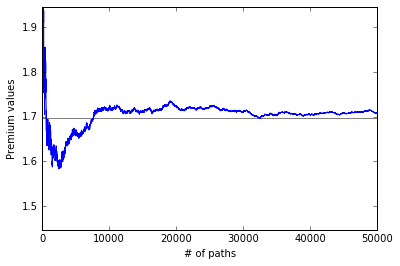

In [56]:
ax1,ax2,ay1,ay2 = plt.axis()
plt.axis((ax1,ax2,putKOprcc-0.25,putKOprcc+0.25))
plt.axhline(putKOprcc, color='grey')
plt.xlabel('# of paths')
plt.ylabel('Premium values')
pd.Series(pr85roll).plot()

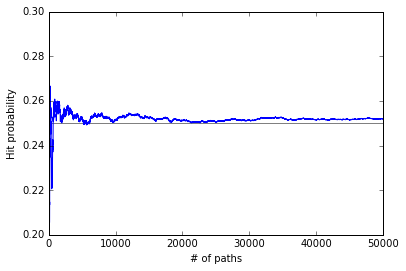

In [59]:
ax1,ax2,ay1,ay2 = plt.axis()
plt.axis((ax1,ax2,0.2,0.3))
plt.axhline(ph85cc, color='grey')
plt.xlabel('# of paths')
plt.ylabel('Hit probability')
pd.Series(hit85roll).plot()

## Monte Carlo path generator with Brownian Bridge

### Let's be careful here and develop the code ... step by step

### After all, we don't want to take a step too far and then come back ... or do we?

Brownian motion:

(12) $$ W(t_{i+1})=W(t_i)+\sqrt{t_{i+1}-t_i}Z(t_{i+1});$$

(13) $$ X(t_{i+1})=X(t_i)+\mu(t_{i+1}-t_i) + \sigma\sqrt{t_{i+1}-t_i}Z(t_{i+1});$$

(14) $$ (W(s) \mid W(s_1)=x_1,W(s_2)=x_2)=N\left(\frac{(s_{i+1}-s).x_i+(s-s_i).x_{i+1}}{(s_{i+1}-s_i)},\frac{(s_{i+1}-s)(s-s_i)}{(s_{i+1}-s_i)}\right); $$

(15) $$ W(s)=\frac{(s_{i+1}-s).x_i+(s-s_i).x_{i+1}}{(s_{i+1}-s_i)}+\sqrt{\frac{(s_{i+1}-s)(s-s_i)}{(s_{i+1}-s_i)}}Z;$$

### Pseudocode from Glasserman for W:

  
    Z[i] is draw i of N(0,1)
    h=2^m=nsteps
    jmax=1 
    w[h]=sqrt(t[h]).Z[h]   
    t[0]=0   
    w[0]=0   
    for k=1 to m
        imin=h/2
        i=imin
        lt=0
        rt=h
        for j=1 to jmax
            a=( (t[rt]-t[i]).w[lt] + (t[i]-t[lt]).w[rt] ) / (t[rt]-t[lt])
            b=sqrt( (t[rt]-t[i]).(t[i]-t[lt]) / (t[rt]-t[lt]) )
            w[i]=a+b.Z[i]
            i=i+h
            lt=lt+h
            rt=rt+h
        end
        jmax=2.jmax
        h=imin
    end
    return array w (size h)

### Defining functions for the inner loop:

Get W(s) given W(t1) and W(t2)

In [60]:
def bbw(t1,t2,t,w1,w2):
    # generate random number
    z=np.random.standard_normal()
    # initial value for Log(S0)
    a=((t2-t)*w1+(t-t1)*w2)/(t2-t1)
    b=np.sqrt((t2-t)*(t-t1)/(t2-t1))
    w=a+b*z
    return w

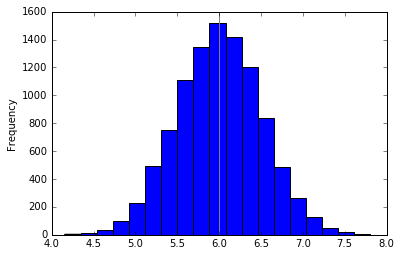

In [61]:
plt.axvline(6, color='grey')
pd.Series(np.array([bbw(0,1,0.5,5,7) for j in range(10000)])).plot(kind='hist', bins=20)

Get the next "layer" of W(s) given W(tj) for a range tj

In [62]:
def bbwnxt(tms):
    wr=tms.values
    tr=tms.index.values
    # new time index
    ntr=np.array((tr[1:]+tr[:-1])/2)
    # apply bbw for each overlapping pair
    w = np.array([bbw(tr[j],tr[j+1],ntr[j],wr[j],wr[j+1]) for j in range(len(tr)-1)])
    return pd.Series(w,index=ntr)

In [63]:
ts1=pd.Series(np.array([0,-0.2,0.1,0.1,0.5]),index=(np.arange(5)/4))
ts1

0.00    0.0
0.25   -0.2
0.50    0.1
0.75    0.1
1.00    0.5
dtype: float64

In [64]:
ts2=bbwnxt(ts1)
ts2

0.125   -0.229975
0.375   -0.110418
0.625    0.361240
0.875    0.190716
dtype: float64

In [65]:
map(np.mean,np.array([bbwnxt(ts1).values for k in range(10000)]).transpose())

[-0.099665122154071334,
 -0.049515527448578088,
 0.099077396377223959,
 0.29774657700976487]

In [66]:
pd.concat([ts1,ts2]).sort_index()

0.000    0.000000
0.125   -0.229975
0.250   -0.200000
0.375   -0.110418
0.500    0.100000
0.625    0.361240
0.750    0.100000
0.875    0.190716
1.000    0.500000
dtype: float64

Put together both layers sorted by the time index

In [67]:
def bbwtnxt(tms):
    return pd.concat([tms,bbwnxt(tms)]).sort_index()

In [68]:
bbwtnxt(ts1)

0.000    0.000000
0.125   -0.439381
0.250   -0.200000
0.375    0.239280
0.500    0.100000
0.625    0.218537
0.750    0.100000
0.875   -0.133567
1.000    0.500000
dtype: float64

### Defining the outer loop:

In [69]:
def bbwpath(m,w0,T):
    # generate random number
    z=np.random.standard_normal()
    # value for x(T)
    wT=w0+z*np.sqrt(T)
    w=pd.Series(np.array([w0,wT]),index=np.array([0,T]))
    for j in range(m):
        w=bbwtnxt(w)
    return w

In [70]:
bbwpath(4,0,5)

0.0000    0.000000
0.3125   -0.204780
0.6250   -0.162645
0.9375   -0.882168
1.2500   -1.502281
1.5625   -1.701282
1.8750   -1.637200
2.1875   -1.241412
2.5000   -0.504242
2.8125   -1.491895
3.1250   -1.055357
3.4375   -0.819734
3.7500   -0.237130
4.0625   -0.765642
4.3750   -0.604870
4.6875   -0.743340
5.0000   -0.643026
dtype: float64

In [71]:
def bbwpathall(m,w0,T):
    wall=[pd.Series(np.array([w0]),index=np.array([0]))]
    # generate random number
    z=np.random.standard_normal()
    # value for x(T)
    wT=w0+z*np.sqrt(T)
    w=pd.Series(np.array([w0,wT]),index=np.array([0,T]))
    wall=wall+[w]
    for j in range(m):
        w=bbwtnxt(w)
        wall=wall+[w]
    return wall

In [72]:
bbp1=bbwpathall(4,0,1)

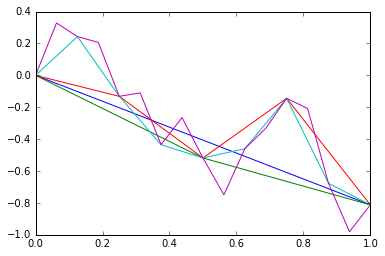

In [73]:
[bbp1[j].plot() for j in range(1,len(bbp1))]

### Pseudocode from Glasserman for X:

  
    Z[i] is draw i of N(0,1)
    h=2^m=nsteps
    jmax=1 
    w[h]=mu*t[h]+sigma*sqrt(t[h]).Z[h]   
    t[0]=0   
    w[0]=0   
    for k=1 to m
        imin=h/2
        i=imin
        lt=0
        rt=h
        for j=1 to jmax
            a=( (t[rt]-t[i]).w[lt] + (t[i]-t[lt]).w[rt] ) / (t[rt]-t[lt])
            b=sqrt( (t[rt]-t[i]).(t[i]-t[lt]) / (t[rt]-t[lt]) )
            w[i]=a+b.sigma*Z[i]
            i=i+h
            lt=lt+h
            rt=rt+h
        end
        jmax=2.jmax
        h=imin
    end
    return array w (size h)

### Defining the functions for a general Brownian Bridge:

In [74]:
def bbx(t1,t2,t,w1,w2,sigma):
    # generate random number
    z=np.random.standard_normal()
    # initial value for Log(S0)
    a=((t2-t)*w1+(t-t1)*w2)/(t2-t1)
    b=np.sqrt((t2-t)*(t-t1)/(t2-t1))
    w=a+b*sigma*z
    return w

In [75]:
def bbxnxt(tms,sigma):
    wr=tms.values
    tr=tms.index.values
    # new time index
    ntr=np.array((tr[1:]+tr[:-1])/2)
    # apply bbw for each overlapping pair
    w = np.array([bbx(tr[j],tr[j+1],ntr[j],wr[j],wr[j+1],sigma) for j in range(len(tr)-1)])
    return pd.Series(w,index=ntr)

In [76]:
def bbxtnxt(tms,sigma):
    return pd.concat([tms,bbxnxt(tms,sigma)]).sort_index()

In [77]:
def bbxpath(m,w0,T,sigma,mu):
    # generate random number
    z=np.random.standard_normal()
    # value for x(T)
    wT=w0+mu*T+z*sigma*np.sqrt(T)
    w=pd.Series(np.array([w0,wT]),index=np.array([0,T]))
    for j in range(m):
        w=bbxtnxt(w,sigma)
    return w

In [78]:
def bbxpathall(m,w0,T,sigma,mu):
    wall=[pd.Series(np.array([w0]),index=np.array([0]))]
    # generate random number
    z=np.random.standard_normal()
    # value for x(T)
    wT=w0+mu*T+z*sigma*np.sqrt(T)
    w=pd.Series(np.array([w0,wT]),index=np.array([0,T]))
    wall=wall+[w]
    for j in range(m):
        w=bbxtnxt(w,sigma)
        wall=wall+[w]
    return wall

In [79]:
bbp2=bbxpathall(4,0,1,0.2,0.1)

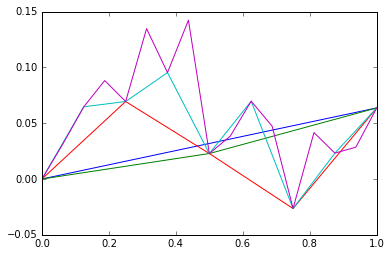

In [80]:
[bbp2[j].plot() for j in range(1,len(bbp2))]

In [81]:
def mcpathbb(nsteps, S0, drift, vol, t):
    lrpath=bbxpath(int(np.log2(nsteps)),0,t,vol,drift-(vol**2)/2)
    spath=pd.Series(S0*np.exp(lrpath.values),index=lrpath.index)
    return spath

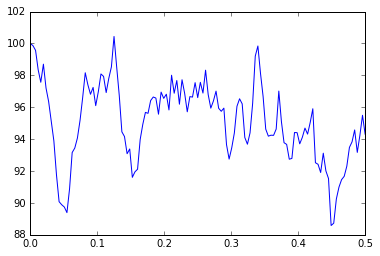

In [82]:
mcpathbb(nstp2,S0,r-q,vol,T).plot()

## Monte Carlo paths generator for Brownian Bridges

In [83]:
def mcpathsbb(npaths, nsteps, S0, drift, vol, t):
    # generate npaths using mcpathbb
    paths=pd.DataFrame([mcpathbb(nsteps, S0, drift, vol, t) for j in range(npaths)])
    return paths

In [84]:
testpath3=mcpathsbb(5,nst0,S0,r-q,vol,T)

In [85]:
testpath3

,0.0,0.00390625,0.0078125,0.01171875,0.015625,0.01953125,0.0234375,0.02734375,0.03125,0.03515625,...,0.46484375,0.46875,0.47265625,0.4765625,0.48046875,0.484375,0.48828125,0.4921875,0.49609375,0.5
0,100.0,101.772268,100.832601,101.048772,101.374002,102.291021,102.160411,102.439090,103.225639,101.948038,...,92.382414,92.476652,92.932523,93.420298,90.480801,90.770212,90.743564,89.986593,88.858473,89.331812
1,100.0,100.186166,99.702330,100.744370,99.653367,100.016643,97.921374,97.304484,96.150990,96.610923,...,101.383597,101.929245,101.762728,102.606417,104.312764,103.878828,104.195924,103.933761,103.629661,103.376399
2,100.0,101.120609,102.019498,101.916048,102.294312,104.185909,102.925385,102.647832,101.236587,101.089329,...,87.004768,85.897694,86.844495,86.726249,85.025789,83.913083,84.150772,86.156386,86.216084,86.714935
3,100.0,97.368450,97.878232,97.510509,98.194527,97.721148,97.542901,95.709934,97.672497,97.687353,...,105.742791,104.682434,104.007851,103.856057,104.666978,104.480626,103.379344,104.214347,102.654849,102.441125
4,100.0,100.759063,100.912634,100.550964,99.227665,98.755909,99.940514,102.615588,102.768014,101.401517,...,99.645582,99.651001,101.178729,102.602226,101.693803,100.352138,100.674459,99.401610,100.670056,98.392324


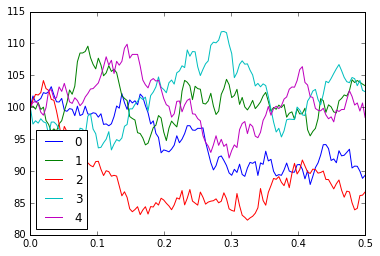

In [86]:
testpath3.transpose().plot()

In [87]:
testpath4=mcpathsbb(npth,1,S0,r-q,vol,T)

In [88]:
[100*np.exp((r-q)*T),(testpath4.transpose()).iloc[1].mean()]

[100.0, 99.85966505680484]

In [89]:
putpocalc2=np.maximum((K-(testpath4.transpose()).iloc[1]),0).mean()
callpocalc2=np.maximum(((testpath4.transpose()-K).iloc[1]),0).mean()

In [90]:
[putpr, putpocalc2*np.exp(-r*T)]

[5.6371977797016655, 5.7018148549505101]

In [91]:
[callpr, callpocalc2*np.exp(-r*T)]

[5.6371977797016655, 5.56147991175584]

In [92]:
[(putpr+callpr)/2, (putpocalc2+callpocalc2)*np.exp(-r*T)/2]

[5.6371977797016655, 5.6316473833531751]

## Controling the Brownian Bridges

    One new point ( S(T) ) and one new interval ( S(0)->S(T) ) is defined
    
    The payoff is calculated using S(T)
    
    For each new point S(t) check if the barrier is hit ( S(t) <= H )
    If the barrier is hit:
        Payoff = 0
        Stop path generation
    
    If barrier was not hit for the new points S(t):
        Calculate the probability of hitting the barrier at the midpoint of each interval defined by these new S(t)
        If the probability is lower than a threshold, freeze this interval (i.e. do not subdivide it further)
        If the probability is higher than the threshold, generate the midpoint
        
    Go back to the test S(t) <= H

The algorithm above will be run using the logreturns; asset prices will be calculated as necessary

In [93]:
def prhit(s0,sT,h,vol,dt):
    if h<min(s0,st):
        return np.exp((-2*np.log(h/s0)*np.log(h/sT))/(dt*vol**2))
    else:
        return 1

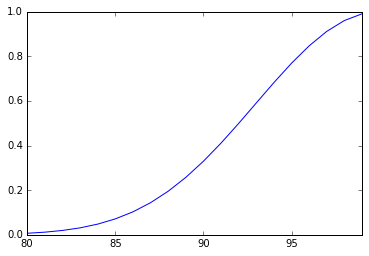

In [94]:
pd.Series(np.array([prhit(S0,S0,h,vol,T) for h in range(S0-20,S0)]),index=np.arange(S0-20,S0)).plot()

In [137]:
def adaptbb(nsteps, S0, K, H, drift, vol, T, alfa, ccf):
    m=int(np.log2(nsteps))
    h=np.log(H/S0)
    # We started with only w0=0
    # Now we generate the first point: wT
    wT=drift*T+np.random.standard_normal()*vol*np.sqrt(T)
    # And we calculate the payoff
    ST=S0*np.exp(wT)
    PO=max(K-ST,0)
    # initial values for the answer
    tint=np.array([0,T])
    wint=np.array([0,wT])
    w=pd.Series(wint,index=tint)
    # Initial check for the barrier and the counter of the depth of the Brownian Bridge
    if (wT<=h):
        hit=1
        PO=0
    else:
        hit=0
    # Initial value for the counter of the depth of the Brownian Bridge
    mc=1
    # The lst arrays indicate the last points generated (to check for a barrier hit)
    lstt=np.array([T])
    lstw=np.array([wT])
    # And the lstint arrays indicate the last intervals generated (to calculate the probability in their midpoints)
    # These arrays have jx2 dimension, each call retrieves a row with the extremes of the interval
    lstintt=np.array([[0,T]])
    lstintw=np.array([[0,wT]])
    lstintv=S0*np.exp(lstintw)
    # We need to check the intervals in the case of no additional points generated
    # So we initialize the temporary variable of the new intervals in a different way
    loopt=np.array([[1]])
    while (hit==0 and mc<=m and np.any(loopt)):
        # add inner loop with j over all possible values of lstintt, lstintv and lstintw
        loopt=np.array([0])
        loopw=np.array([0])
        loopintt=np.array([0,0])
        loopintw=np.array([0,0])
        for j in range(len(lstintt)):
            # Adjust barrier in probability calculation
            if prhit(lstintv[j][0],lstintv[j][1],H*ccf,vol,lstintt[j][1]-lstintt[j][0])>alfa:
                newt=(lstintt[j][0]+lstintt[j][1])/2
                newx=bbx(lstintt[j][0],lstintt[j][1],newt,lstintw[j][0],lstintw[j][1],vol)
                loopt=np.append(loopt,newt)
                loopw=np.append(loopw,newx)
                newintt1=np.array([lstintt[j][0],newt])
                newintt2=np.array([newt,lstintt[j][1]])
                loopintt=np.vstack((loopintt,newintt1,newintt2))
                newintw1=np.array([lstintw[j][0],newx])
                newintw2=np.array([newx,lstintw[j][1]])
                loopintw=np.vstack((loopintw,newintw1,newintw2))
                # add to array of new points if prob>alfa
        lstt=loopt[1:]
        lstw=loopw[1:]
        neww=pd.Series(lstw,index=lstt)
        w=pd.concat([w,neww]).sort_index()
        lstintt=loopintt[1:]
        lstintw=loopintw[1:]
        lstintv=S0*np.exp(lstintw)
        mc=mc+1
        # Just check the minimum of lstw, no need to check them all
        if np.any(loopt):
            if np.amin(lstw)<=h:
                hit=1
                PO=0
    ans1=[S0*np.exp(w),hit,PO]
    return ans1

In [96]:
alfa1=0.01

In [138]:
[adaptbb(1, S0, K, H, r-q, vol, T, alfa1, ccf) for j in range(10)]

[[0.0    100.000000
  0.5    100.790067
  dtype: float64, 0, 0], [0.0    100.000000
  0.5    115.368405
  dtype: float64, 0, 0], [0.0    100.00000
  0.5    118.62238
  dtype: float64, 0, 0], [0.0    100.000000
  0.5    102.578343
  dtype: float64, 0, 0], [0.0    100.000000
  0.5    102.713434
  dtype: float64, 0, 0], [0.0    100.000000
  0.5     91.489381
  dtype: float64, 0, 8.5106189638505754], [0.0    100.000000
  0.5    104.679208
  dtype: float64, 0, 0], [0.0    100.000000
  0.5     68.626174
  dtype: float64, 1, 0], [0.0    100.000000
  0.5    101.149779
  dtype: float64, 0, 0], [0.0    100.000000
  0.5     84.728364
  dtype: float64, 1, 0]]

In [139]:
[adaptbb(2, S0, K, H, r-q, vol, T, alfa1, ccf) for j in range(5)]

[[0.0    100.000000
  0.5    115.742005
  dtype: float64, 0, 0], [0.0    100.00000
  0.5    119.34081
  dtype: float64, 0, 0], [0.00    100.000000
  0.25    107.773169
  0.50     98.934891
  dtype: float64, 0, 1.0651089423237607], [0.00    100.000000
  0.25     89.614371
  0.50     91.916723
  dtype: float64, 0, 8.0832766433878618], [0.00    100.000000
  0.25    107.091596
  0.50     95.029271
  dtype: float64, 0, 4.9707286464643659]]

In [140]:
[adaptbb(4, S0, K, H, r-q, vol, T, alfa1, ccf) for j in range(10)]

[[0.000    100.000000
  0.125     91.962565
  0.250     93.021097
  0.375     92.863010
  0.500     91.179758
  dtype: float64, 0, 8.8202420512101156], [0.000    100.000000
  0.125    105.030520
  0.250     90.609342
  0.375     91.035237
  0.500     88.472433
  dtype: float64, 0, 11.527567413530633], [0.00    100.000000
  0.25    101.601762
  0.50    107.571147
  dtype: float64, 0, 0], [0.00    100.000000
  0.25     99.901476
  0.50     97.441797
  dtype: float64, 0, 2.5582029585635979], [0.000    100.000000
  0.250     97.521992
  0.375     97.370928
  0.500     92.420920
  dtype: float64, 0, 7.5790801823258818], [0.0    100.000000
  0.5     77.918408
  dtype: float64, 1, 0], [0.0    100.00000
  0.5    110.93359
  dtype: float64, 0, 0], [0.0    100.000000
  0.5    119.006503
  dtype: float64, 0, 0], [0.00    100.000000
  0.25     84.325682
  0.50    105.700565
  dtype: float64, 1, 0], [0.000    100.000000
  0.250    106.773892
  0.375     97.721870
  0.500     88.664576
  dtype: floa

In [141]:
[adaptbb(8, S0, K, H, r-q, vol, T, alfa1, ccf) for j in range(10)]

[[0.0    100.000000
  0.5    115.501547
  dtype: float64, 0, 0], [0.0    100.000000
  0.5     76.517813
  dtype: float64, 1, 0], [0.0000    100.000000
  0.0625     89.176046
  0.1250     87.774163
  0.1875     91.477103
  0.2500     96.398720
  0.5000    107.952648
  dtype: float64, 0, 0], [0.0    100.000000
  0.5    115.225553
  dtype: float64, 0, 0], [0.0    100.000000
  0.5    119.332988
  dtype: float64, 0, 0], [0.0000    100.000000
  0.1250     95.125619
  0.2500     93.267181
  0.3125     87.708952
  0.3750     88.094559
  0.4375     86.785860
  0.5000     91.236610
  dtype: float64, 0, 8.7633900947954402], [0.000    100.000000
  0.250     96.820497
  0.375    103.145316
  0.500     92.419363
  dtype: float64, 0, 7.5806373887869256], [0.000    100.000000
  0.250    102.660115
  0.375     97.962427
  0.500     91.479421
  dtype: float64, 0, 8.5205788273944165], [0.00    100.000000
  0.25    106.526269
  0.50     98.865378
  dtype: float64, 0, 1.1346224895728056], [0.0    100.00000

### Checking the results

In [143]:
def checkpath(x, H):
    if np.amin(x)<=H:
        return 1
    else:
        return 0

In [142]:
adappathsplus1=[adaptbb(nst0, S0, K, H, r-q, vol, T, alfa1, ccf) for j in range(npth)]

In [144]:
adappaths1=[x[0] for x in adappathsplus1]
adaphits1=np.array([x[1] for x in adappathsplus1])
adapPOs1=np.array([x[2] for x in adappathsplus1])

In [145]:
adapsize1=np.sum([len(x) for x in adappaths1])
adapsize1

223602

In [147]:
adapmin1=np.array([checkpath(x, H) for x in adappaths1])

In [148]:
np.any(adapmin1-adaphits1)

False

In [150]:
[adapmin1.mean(),adaphits1.mean()]

[0.2233, 0.2233]

In [151]:
adappr1=(adapPOs1.mean())*np.exp(-r*T)
adappr1

1.6607253706908296

In [152]:
adapPOsroll1=(adapPOs1*np.exp(-r*T)).cumsum()/np.array(np.arange(1,npth+1))

In [182]:
adapPOsroll1

array([ 0.        ,  0.        ,  0.        , ...,  1.66059559,
        1.66072336,  1.66072537])

In [153]:
alfa2=0.0001

In [154]:
adappathsplus2=[adaptbb(nst0, S0, K, H, r-q, vol, T, alfa2, ccf) for j in range(npth)]

In [155]:
adappaths2=[x[0] for x in adappathsplus2]
adaphits2=np.array([x[1] for x in adappathsplus2])
adapPOs2=np.array([x[2] for x in adappathsplus2])

In [156]:
adapsize2=np.sum([len(x) for x in adappaths2])
adapsize2

372998

In [157]:
adaphits2.mean()

0.23318

In [158]:
adappr2=(adapPOs2.mean())*np.exp(-r*T)
adappr2

1.6334964581129261

In [159]:
adapPOsroll2=(adapPOs2*np.exp(-r*T)).cumsum()/np.array(np.arange(1,npth+1))

In [162]:
npth3=10*npth

In [163]:
adappathsplus3=[adaptbb(nst0, S0, K, H, r-q, vol, T, alfa1, ccf) for j in range(npth3)]

In [164]:
adappaths3=[x[0] for x in adappathsplus3]
adaphits3=np.array([x[1] for x in adappathsplus3])
adapPOs3=np.array([x[2] for x in adappathsplus3])

In [165]:
adapsize3=np.sum([len(x) for x in adappaths3])
adapsize3

2240389

In [166]:
adaphits3.mean()

0.225162

In [167]:
adappr3=(adapPOs3.mean())*np.exp(-r*T)
adappr3

1.6407223612580173

In [168]:
adapPOsroll3=(adapPOs3*np.exp(-r*T)).cumsum()/np.array(np.arange(1,npth3+1))

### Convergence analysis

In [173]:
dfroll=pd.DataFrame({"MC":pr85roll,"BB1":adapPOsroll1,"BB2":adapPOsroll2})

In [198]:
dfroll2=pd.DataFrame({"BB3":adapPOsroll3})

In [199]:
dfroll2["MC"]=pr85roll

In [200]:
dfroll2["BB1"]=pd.Series(adapPOsroll1)
dfroll2["BB2"]=pd.Series(adapPOsroll2)

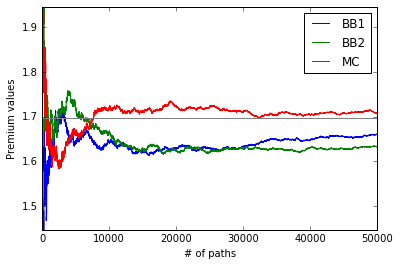

In [203]:
chrt1=dfroll.plot(ylim=[putKOprcc-0.25,putKOprcc+0.25])
plt.axhline(putKOprcc, color='grey')
chrt1.set_xlabel('# of paths')
chrt1.set_ylabel('Premium values')

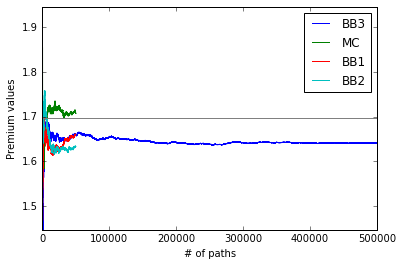

In [202]:
chrt1=dfroll2.plot(ylim=[putKOprcc-0.25,putKOprcc+0.25])
plt.axhline(putKOprcc, color='grey')
chrt1.set_xlabel('# of paths')
chrt1.set_ylabel('Premium values')

## Table 1: Comparison of the number of points, calculated values and frequency of barrier hits

In [205]:
frmsize='NaN'
frmpremium=putKOprcc
frmhits=ph85cc
mcsize=(nst0+1)*npth/1e+06
mcpremium=pr85
mchits=hit85.mean()
bbsize1=adapsize1/1e+06
bbpremium1=adappr1
bbhits1=adaphits1.mean()
bbsize2=adapsize2/1e+06
bbpremium2=adappr2
bbhits2=adaphits2.mean()
bbsize3=adapsize3/1e+06
bbpremium3=adappr3
bbhits3=adaphits3.mean()
frmbanumbers=np.array([frmsize,frmpremium,frmhits])
mcnumbers=np.array([mcsize,mcpremium,mchits])
bbnumbers1=np.array([bbsize1,bbpremium1,bbhits1])
bbnumbers2=np.array([bbsize2,bbpremium2,bbhits2])
bbnumbers3=np.array([bbsize3,bbpremium3,bbhits3])
dfsumm=pd.DataFrame([frmbanumbers,mcnumbers,bbnumbers1,bbnumbers2,bbnumbers3],\
                    index=["Formula","MC","BB 1%","BB 0.1%","More BB 1%"],\
                    columns=['Number of points (millions)', 'RKO premium', 'Barrier hits'])
dfsumm.index.name='Method'
dfsumm

,Number of points (millions),RKO premium,Barrier hits
Method,,,
Formula,NaN,1.69664927074,0.249879633104
MC,6.45,1.70771,0.2518
BB 1%,0.223602,1.66073,0.2233
BB 0.1%,0.372998,1.6335,0.23318
More BB 1%,2.24039,1.64072,0.225162


### Error analysis

The downward bias after 10000 paths is interesting, and it doesn't disappear with more paths (see simulation 3, legend "More BB 1%).

## Conclusions

  In this exercise we learned:
  - How to price an european option with Monte Carlo
  - How to price a barrier option with Monte Carlo
  - The necessity of the continuity correction
  - How to use the Brownian Bridge method to fill a path
  - How to use an adaptative Brownian Bridge method to price a barrier option while trying to minimize the number of points generated
  
  
  The algorithm to solve the last problem is interesting, because it forces one to think about the best way to structure the data in order to use the test conditions.

## References

1. "The Complete Guide to Option Pricing Formulas", 2nd Edition, by Espen Gaarder Haug, McGrawHill, 2007
2. "Monte Carlo Methods in Financial Engineering", Paul Glasserman, Springer, 2004
3. "A Continuity Correction for Discrete barrier Options", Mark Braodie, Paul Glasserman, Steven Kou, Mathematical Finance, Vol. 7, No. 4, October 1997)
4. "Financial Engineering and Computation: Principles, Mathematics, Algorithms", Yuh-Dauh Lyuu, Cambridge University Press, 2001